In [1]:
%pylab inline

# input image dimensions
#img_rows, img_cols = 28, 28
#
# # Uncomment the following lines if you have keras installed. Otherwise you can 
# # use the file I uploaded: mnist.npz
#import keras
#from keras.datasets import mnist
#from keras import backend as K
#
#
# the data, split between train and test sets
#(x_train, y_train), (x_test, y_test) = mnist.load_data()
#
#if K.image_data_format() == 'channels_first':
#    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
#    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
#    input_shape = (img_rows, img_cols)
#else:
#    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols)
#    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols)
#    input_shape = (img_rows, img_cols)
#
#x_train = x_train.astype('float32')
#x_test = x_test.astype('float32')
#x_train /= 255
#x_test /= 255

#np.savez_compressed('mnist.npz', x_train, y_train, x_test, y_test)

arc = load('mnist.npz')

x_train = arc['arr_0']
y_train = arc['arr_1']
x_test  = arc['arr_2']
y_test  = arc['arr_3']

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

Populating the interactive namespace from numpy and matplotlib
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


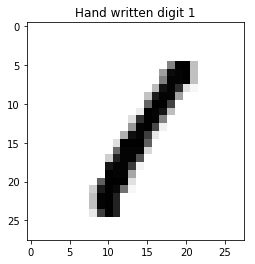

In [2]:
import matplotlib.pyplot as plot
import math

# Show image number 15, and write in the title what digit it should correspond to
N=3
imshow(x_train[N], cmap='gray_r')
_ = title('Hand written digit '+str(y_train[N]))

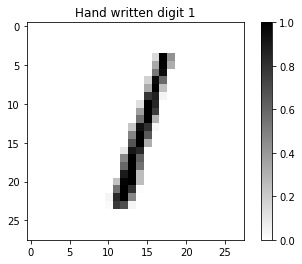

In [30]:
N=2
imshow(x_test[N], cmap='gray_r')
colorbar()
_ = title('Hand written digit '+str(y_test[N]))

In [4]:
##Assignment 1

#Functions:
#Naive
def d_infty(x,z):
    dist0 = 0
    for i in range(28):
        for j in range(28):
            temp = abs(z[i,j]-x[i,j])
            if temp > dist0:
                dist0 = temp
    return dist0
def d_one(x,z):
    dist1 = 0
    for i in range(28):
        for j in range(28):
            temp = z[i,j]-x[i,j]
            dist1 += abs(temp)
    return dist1
def d_two(x,z):
    dist2 = 0
    for i in range(28):
        for j in range(28):
            temp = z[i,j]-x[i,j]
            dist2 += temp*temp
    return math.sqrt(dist2)
#Optimized
def opt_d_infty(x,z):
    xx = np.array(x)
    zz = np.array(z)
    dd = abs(np.subtract(xx,zz))
    return dd.max()
def opt_d_one(x,z):
    xx = np.array(x)
    zz = np.array(z)
    dd = abs(np.subtract(xx,zz))
    return np.sum(dd)
def opt_d_two(x,z):
    xx = np.array(x)
    zz = np.array(z)
    dd = abs(np.subtract(xx,zz))
    dd2 = dd*dd
    return np.sqrt(np.sum(dd2))

In [5]:
naive = d_two(x_train[2],x_test[2])
print (naive)
opt = opt_d_two(x_train[2],x_test[2])
print (opt)
print ("relative error: ",(abs(naive-opt)/naive)*100,"%")

#%timeit opt_d_two(x_train[2],x_test[2])
#%timeit opt_d_two(x_train[2],x_train[2])
#%timeit d_two(x_train[2],x_test[2])
#%timeit d_two(x_train[2],x_train[2])

9.153183211210528
9.153183
relative error:  2.4888837654895845e-06 %


In [6]:
naive = d_one(x_train[2],x_test[2])
print (naive)
opt = opt_d_one(x_train[2],x_test[2])
print (opt)
print ("relative error: ",(abs(naive-opt)/naive)*100,"%")

#%timeit opt_d_one(x_train[2],x_test[2])
#%timeit opt_d_one(x_train[2],x_train[2])
#%timeit d_one(x_train[2],x_test[2])
#%timeit d_one(x_train[2],x_train[2])

107.5294131655246
107.52942
relative error:  5.375076202793543e-06 %


In [7]:
print (d_infty(x_train[2],x_test[2]))
print (opt_d_infty(x_train[2],x_test[2]))

#%timeit opt_d_infty(x_train[2],x_test[2])
#%timeit opt_d_infty(x_train[2],x_train[2])
#%timeit d_infty(x_train[2],x_test[2])
#%timeit d_infty(x_train[2],x_train[2])

1.0
1.0


In [8]:
def func_dist(d,x,z):
    result = d(x,z)
    return result

In [9]:
#%timeit func_dist(d_one,x_train[2],x_test[2])

In [10]:
#$Assignment 2

#import numpy as np
def func_dist(N,d,x,z):
    D = np.zeros((N,N)) 
    for i in range(N):
        for j in range(i+1):
            #print(j,i)
            D[i,j] = d(x[i],z[j])
            if i!=j: D[j,i]=D[i,j]
    return D

In [11]:
func_dist(4, opt_d_one, x_train, x_test)

array([[113.46274567, 135.50196838, 116.37255096, 120.21568298],
       [135.50196838, 161.79216003, 166.45098877, 140.35687256],
       [116.37255096, 166.45098877, 107.52941895,  56.27450943],
       [120.21568298, 140.35687256,  56.27450943, 169.66667175]])

In [12]:
D4 = func_dist(4, d_infty, x_train, x_train)
D4opt = func_dist(4, opt_d_infty, x_train, x_train)
print(D4)
print(D4opt)

[[0.         1.         1.         0.99215686]
 [1.         0.         1.         1.        ]
 [1.         1.         0.         1.        ]
 [0.99215686 1.         1.         0.        ]]
[[0.         1.         1.         0.99215686]
 [1.         0.         1.         1.        ]
 [1.         1.         0.         1.        ]
 [0.99215686 1.         1.         0.        ]]


In [13]:
D4one = func_dist(4, d_one, x_train, x_train)
D4optone = func_dist(4, opt_d_one, x_train, x_train)
print(D4one)
print(D4optone)

[[  0.         115.70980474 148.5019625  122.61176573]
 [115.70980474   0.         160.91764866 141.45882461]
 [148.5019625  160.91764866   0.         125.60784444]
 [122.61176573 141.45882461 125.60784444   0.        ]]
[[  0.         115.70979309 148.50196838 122.61177063]
 [115.70979309   0.         160.91764832 141.45881653]
 [148.50196838 160.91764832   0.         125.60784149]
 [122.61177063 141.45881653 125.60784149   0.        ]]


In [14]:
#%timeit func_dist(1000,opt_d_infty,x_train,x_train)
#%timeit func_dist(1000,opt_d_one,x_train,x_train)
#%timeit func_dist(1000,opt_d_two,x_train,x_train)

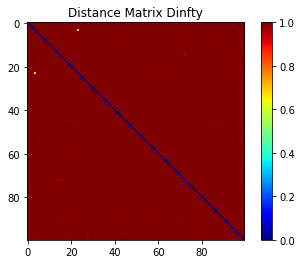

In [15]:
#Assingment 3
N = 100
Dinfty = func_dist(N,opt_d_infty,x_train,x_train)
imshow(Dinfty, cmap='jet')
colorbar()
_ = title('Distance Matrix Dinfty')

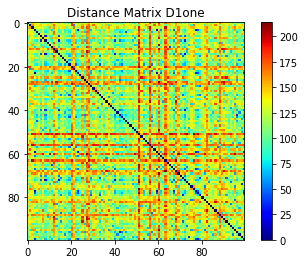

In [16]:
N = 100 
D1one = func_dist(N,opt_d_one,x_train,x_train)
imshow(D1one, cmap='jet')
colorbar()
_ = title('Distance Matrix D1one')

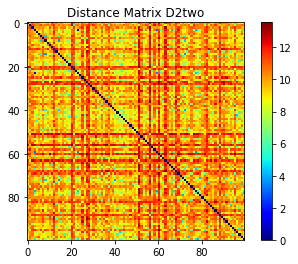

In [17]:
N = 100 
D2two = func_dist(N,opt_d_two,x_train,x_train)
imshow(D2two, cmap='jet')
colorbar()
_ = title('Distance Matrix D2two')

In [18]:
##Assignment 4

def efficency(D,N,Y):

    error_counter = 0
    for i in range(N):
        D[i,i]=D[i,N-1]
    for i in range(N-1):
        A = np.array(D[i])
        a_val = A.min()
        a = A.argmin()
        if Y[a]!=Y[i]:
            error_counter += 1
  
    return error_counter/N
            

In [19]:
#Assignment 5

E = np.zeros((3))
i=0
for k in 100, 200:#, 400, 800, 1600:
    D0 = func_dist(k,opt_d_infty,x_train,x_train)
    E[0] = efficency(D0, k, y_train)
    D1 = func_dist(k,opt_d_one,x_train,x_train)
    E[1] = efficency(D1, k, y_train)
    D2 = func_dist(k,opt_d_two,x_train,x_train)
    E[2] = efficency(D2, k, y_train)
    print (E)

[0.57 0.16 0.16]
[0.515 0.145 0.135]


In [22]:
#Assignment 6

In [23]:
#Assignment 7

In [24]:
##Assignment 8

In [24]:
import sklearn.neighbors as sklN

In [26]:
#X_train = np.ndarray(x_train[:10],dtype=float32)
#%timeit tree = sklN.BallTree(x_train[:N].reshape(N,28*28),metric=opt_d_two)
#%timeit treee = sklN.BallTree(x_train[:N].reshape(N,28*28),metric='euclidean')              

#tree = sklN.BallTree(x_train[:N].reshape(N,28*28),metric='euclidean')
#val, idx = tree.query(x_test[:N].reshape(N,28*28), k=2)
#print(k)
#print(val)

In [27]:
#N=10
#tree = sklN.BallTree(x_train[:N].reshape(N,28*28),metric=opt_d_two)
#val, idx = tree.query(x_test[:N].reshape(N,28*28),k=4)
#print(idx)
#print(val)

In [28]:
#tree2 = sklN.BallTree(x_train[:2000].reshape(2000,28*28),metric=opt_d_one)
#dist, ind = tree2.query(x_train[:1000].reshape(1000,28*28), k=900)
#tree1 = sklN.BallTree(x_train[:2000].reshape(2000,28*28),metric='manhattan')  
#distt, indd = tree1.query(x_train[:1000].reshape(1000,28*28), k=900)
#print(np.array_equal(ind,indd))
#print(np.array_equal(dist,distt))

In [26]:
def efficency_of_test(N):
    tree = sklN.BallTree(x_train[:N].reshape(N,28*28),metric='euclidean')
    val, idx = tree.query(x_test[:10000].reshape(10000,28*28),k=1)
    #print(idx)
    error_counter=0
    for i in range(10000):
        if y_train[idx[i]]!=y_test[i]: error_counter+=1
#print(i, idx[i], y_train[idx[i]])
#print(i, y_test[i])
    return (N, error_counter/len(x_test))   

In [27]:
NN=[100,200,300,400,500]
list_eff=[efficency_of_test(n) for n in NN]
#    eff.append(efficency_of_test(n))
#    print(eff)

[(100, 0.3206), (200, 0.249), (300, 0.2077), (400, 0.1836), (500, 0.1706)]
[100, 200, 300, 400, 500]
[0.3206, 0.249, 0.2077, 0.1836, 0.1706]


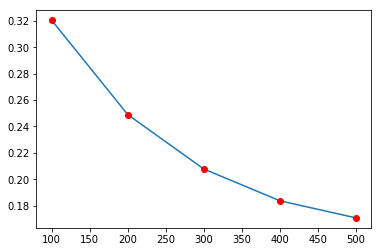

In [28]:
print(list_eff)
x_eff = [l[0] for l in list_eff]
y_eff = [l[1] for l in list_eff]
print(x_eff)
print(y_eff)

#import matplotlib.pyplot as plt
plot.plot(x_eff,y_eff)
plot.plot(x_eff,y_eff, 'or')
plot.show()

In [29]:
NNN=[3200, 6400, 12800, 25600, 51200]
list_eff2=[efficency_of_test(n) for n in NNN]

[(3200, 0.0783), (6400, 0.0631), (12800, 0.049), (25600, 0.0402), (51200, 0.0329)]
[3200, 6400, 12800, 25600, 51200]
[0.0783, 0.0631, 0.049, 0.0402, 0.0329]


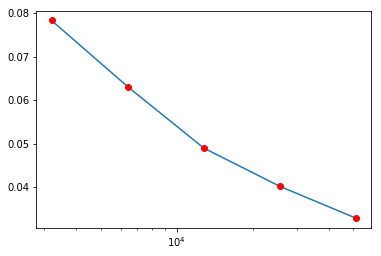

In [33]:
print(list_eff2)
x_eff2 = [l[0] for l in list_eff2]
y_eff2 = [l[1] for l in list_eff2]
print(x_eff2)
print(y_eff2)

#import matplotlib.pyplot as plt
plot.xscale('log')
plot.plot(x_eff2,y_eff2)
plot.plot(x_eff2,y_eff2, 'or')
plot.show()